In [15]:
import pandas as pd
from tabulate import tabulate
from sklearn import linear_model
df=pd.read_csv("C:\\Users\\ANISH M S\\Downloads\\homeprices (2).csv")
print(tabulate(df,headers="keys",tablefmt="grid"))

+----+-----------------+--------+---------+
|    | town            |   area |   price |
+====+=================+========+=========+
|  0 | monroe township |   2600 |  550000 |
+----+-----------------+--------+---------+
|  1 | monroe township |   3000 |  565000 |
+----+-----------------+--------+---------+
|  2 | monroe township |   3200 |  610000 |
+----+-----------------+--------+---------+
|  3 | monroe township |   3600 |  680000 |
+----+-----------------+--------+---------+
|  4 | monroe township |   4000 |  725000 |
+----+-----------------+--------+---------+
|  5 | west windsor    |   2600 |  585000 |
+----+-----------------+--------+---------+
|  6 | west windsor    |   2800 |  615000 |
+----+-----------------+--------+---------+
|  7 | west windsor    |   3300 |  650000 |
+----+-----------------+--------+---------+
|  8 | west windsor    |   3600 |  710000 |
+----+-----------------+--------+---------+
|  9 | robinsville     |   2600 |  575000 |
+----+-----------------+--------

In [3]:
dummies=pd.get_dummies(df.town)
print(dummies)

    monroe township  robinsville  west windsor
0              True        False         False
1              True        False         False
2              True        False         False
3              True        False         False
4              True        False         False
5             False        False          True
6             False        False          True
7             False        False          True
8             False        False          True
9             False         True         False
10            False         True         False
11            False         True         False
12            False         True         False


In [10]:
merged=pd.concat([df,dummies],axis=1)
print(merged)

               town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000             True        False         False
1   monroe township  3000  565000             True        False         False
2   monroe township  3200  610000             True        False         False
3   monroe township  3600  680000             True        False         False
4   monroe township  4000  725000             True        False         False
5      west windsor  2600  585000            False        False          True
6      west windsor  2800  615000            False        False          True
7      west windsor  3300  650000            False        False          True
8      west windsor  3600  710000            False        False          True
9       robinsville  2600  575000            False         True         False
10      robinsville  2900  600000            False         True         False
11      robinsville  3100  620000            False         True 

In [14]:
final=merged.drop(['town','west windsor'],axis=1)
print(final)

    area   price  monroe township  robinsville
0   2600  550000             True        False
1   3000  565000             True        False
2   3200  610000             True        False
3   3600  680000             True        False
4   4000  725000             True        False
5   2600  585000            False        False
6   2800  615000            False        False
7   3300  650000            False        False
8   3600  710000            False        False
9   2600  575000            False         True
10  2900  600000            False         True
11  3100  620000            False         True
12  3600  695000            False         True


In [16]:
reg=linear_model.LinearRegression()
reg.fit(final[['area','monroe township','robinsville']],final.price)

LinearRegression()

In [17]:
reg.predict([[3300,1,0]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628537.94882821])

In [18]:
reg.score(final[['area','monroe township','robinsville']],final.price)

0.9573929037221872

In [19]:
#another method is written the notebook
#where the 2 seprate dataframes are made and put into training like reg.fit(x,y) where x and y are dataframes

+----+-----------------+--------+---------+
|    | town            |   area |   price |
+====+=================+========+=========+
|  0 | monroe township |   2600 |  550000 |
+----+-----------------+--------+---------+
|  1 | monroe township |   3000 |  565000 |
+----+-----------------+--------+---------+
|  2 | monroe township |   3200 |  610000 |
+----+-----------------+--------+---------+
|  3 | monroe township |   3600 |  680000 |
+----+-----------------+--------+---------+
|  4 | monroe township |   4000 |  725000 |
+----+-----------------+--------+---------+
|  5 | west windsor    |   2600 |  585000 |
+----+-----------------+--------+---------+
|  6 | west windsor    |   2800 |  615000 |
+----+-----------------+--------+---------+
|  7 | west windsor    |   3300 |  650000 |
+----+-----------------+--------+---------+
|  8 | west windsor    |   3600 |  710000 |
+----+-----------------+--------+---------+
|  9 | robinsville     |   2600 |  575000 |
+----+-----------------+--------

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- monroe township
- robinsville


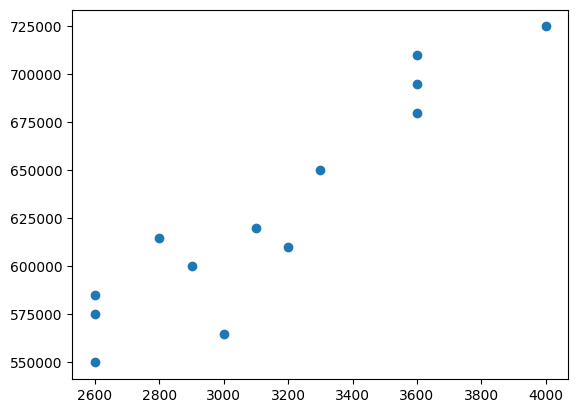

In [26]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\ANISH M S\\Downloads\\homeprices (2).csv")
print(tabulate(df,headers="keys",tablefmt="grid"))
plt.scatter(final['area'],final['price'])
final.plot(final.area,reg.predict(final[['area']]),color='green')